In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
# Define the URL
URL = "https://www.uta-net.com/artist/4002/4/"

# Make a GET request to the URL
r = requests.get(URL)

# Write the response content to a file named "home.html"
with open("home.html", "wb") as f:
    f.write(r.content)

In [ ]:
# Open and read home.html
with open("home.html", "r", encoding="utf-8") as file:
    html_content = file.read()
    soup = BeautifulSoup(html_content, "html.parser")

    # Find all the links with class "py-2 py-lg-0" and create absolute URLs
    links = [f"https://www.uta-net.com{link.get('href')}" for link in soup.find_all("a", class_="py-2 py-lg-0")]

# Write the links to a CSV file
with open("links.csv", "w", encoding="utf-8") as file:
    for link in links:
        file.write(f"{link}\n")

In [ ]:
import requests
import time
from datetime import datetime
import os

# Read URLs from links.csv
url_list = []
with open("links.csv", "r", encoding="utf-8") as csv_file:
    for url in csv_file:
        clean_url = url.strip()
        url_list.append(clean_url)

# if the html_files folder exsist, Count the number of files in the html_files folder
if os.path.exists("html_files"):
    html_files_count = sum(len(files) for _, _, files in os.walk("html_files"))
else:
    # make directory
    os.mkdir("html_files")
    html_files_count = 0

# Download html files from clean_url
for clean_url in url_list[html_files_count:]:
    print(f"Downloading {clean_url}")
    response = requests.get(clean_url)
    current_time = datetime.now().strftime("%Y%m%d%H%M%S")
    with open(f"./html_files/{current_time}.html", "wb") as html_file:
        html_file.write(response.content)
    time.sleep(5)

In [ ]:
import glob
from bs4 import BeautifulSoup

html_files = glob.glob("html_files/*.html")

kashi_list = []
for html_file in html_files:
    with open(html_file, "r", encoding="utf-8") as file:
        html_content = file.read()
        soup = BeautifulSoup(html_content, "html.parser")
        kashi_area = soup.find("div", {"id": "kashi_area"})
        if kashi_area:
            kashi_text = kashi_area.text
            kashi_list.append(kashi_text)

# Write kashi_text to kashi.csv separated by commas
with open("kashi.csv", "w", encoding="utf-8") as kashi_file:
    for kashi_text in kashi_list:
        kashi_file.write(f"{kashi_text},")

In [ ]:
# open kashi.csv and combine one string variable without pandas
with open("kashi.csv", "r", encoding="utf-8") as kashi_file:
    combined_string = ",".join(line.strip() for line in kashi_file)
print(combined_string)

# morphological analysis of japanese with python exclude mecab
# You can perform morphological analysis of Japanese text in Python using libraries like Janome or SudachiPy, which can exclude MeCab as an option.
# Here is an example using Janome:
from janome.tokenizer import Tokenizer
import csv

# text = ""
text = combined_string
tokenizer = Tokenizer()
tokens = tokenizer.tokenize(text)

# Prepare data for CSV
rows = [[token.surface, token.part_of_speech] for token in tokens]

# Write to CSV
with open('kashi_janome.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["Token", "Part of Speech"])  # Writing headers
    writer.writerows(rows)

In [ ]:
# open kashi_janome.csv and extract words that is nouns
import csv
from janome.tokenizer import Tokenizer

def extract_pos(pos="名詞", output_file="kashi_nouns.csv"):
    pos_list = []
    with open("kashi_janome.csv", "r", newline='', encoding='utf-8') as f:
        reader = csv.reader(f)
        next(reader)  # Skip headers
        for row in reader:
            if pos in row[1]:
                pos_list.append(row[0])

    print(pos_list)

    # save nouns to csv
    with open(output_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerows([pos_list])

In [ ]:
extract_pos("名詞", "kashi_nouns.csv")
# extract_pos("動詞", "kashi_verbs.csv")
# extract_pos("形容詞", "kashi_adjective.csv")

In [ ]:
import os
import csv
from wordcloud import WordCloud
from datetime import datetime
import matplotlib.pyplot as plt
import random

def word_cloud(csv_path='kashi_nouns.csv', output_dir="nouns"):
    nouns = []

    # Read nouns from kashi_nouns.csv
    with open(csv_path, 'r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            # Caution: random sampling is used here!!!!!!!!!
            if random.random() < 0.4:
                nouns.extend(row)

    # If nouns is empty, exit
    if not nouns:
        print("No nouns found because of randomness.")
        return

    # Generate word cloud
    wordcloud = WordCloud(
        width=900,
        height=900,
        background_color='white',
        font_path='Noto_Sans_JP/NotoSansJP-VariableFont_wght.ttf',
        stopwords={"ん", "お", "の", "こ", "（", "）", "お", "さ", "た", "だ", "な", "し", "き", "な", "ま", "し", "い", "な", "し", "", "ない", "し", "し", "し", "し", "し"}
    ).generate(' '.join(nouns))

    # Create folder if it doesn't exist
    folder_name = "wordcloud"
    if not os.path.exists(folder_name):
        os.mkdir(folder_name)
    if not os.path.exists(f"{folder_name}/{output_dir}"):
        os.mkdir(f"{folder_name}/{output_dir}")

    # Save word cloud image
    current_time = datetime.now().strftime("%Y%m%d%H%M%S")
    wordcloud.to_file(f"./wordcloud/{output_dir}/{current_time}.png")

    # Display word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

In [ ]:
NUM = 10
for _ in range(NUM):
    # You can change arguments
    word_cloud(csv_path="kashi_nouns.csv", output_dir="nouns")
    # word_cloud(csv_path="kashi_verbs.csv", output_dir="verbs")
    # word_cloud(csv_path="kashi_adjective.csv", output_dir="adjective")

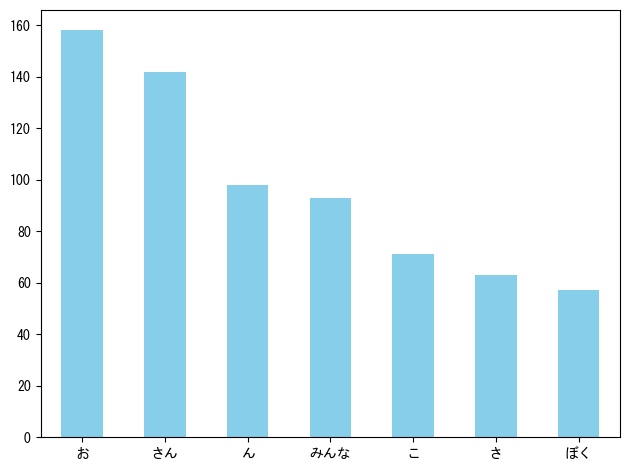

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path for the CSV containing the data
csv_file_path = 'kashi_nouns.csv'

# Read the CSV file into a DataFrame
data_frame = pd.read_csv(csv_file_path, header=None)

# Flatten the DataFrame, remove null values, and count the occurrences of each word
all_words = data_frame.values.flatten()
all_words = [str(word).strip() for word in all_words if pd.notnull(word)]
word_counts = pd.Series(all_words).value_counts()[:10]

# Exclude words in the blacklist
blacklist = ["(", ")", ","]
word_counts = word_counts.drop(blacklist)

# Set the font for the plot
plt.rcParams['font.family'] = "MS Gothic"

# Create a bar plot, rotate the x-axis labels, adjust the layout, and display the plot
word_counts.plot(kind='bar', color='skyblue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()